<a href="https://colab.research.google.com/github/vantainguyen/Computation-of-magnetic-field/blob/master/3D_data_in_nifti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

useGoogleDrive=0

if useGoogleDrive:
  drive.mount('/content/gdrive')
import numpy as np
!pip install raster_geometry
import raster_geometry.raster as raster

     |████████████████████████████████| 69 kB 3.6 MB/s 
     |████████████████████████████████| 182 kB 10.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 


In [132]:
import matplotlib.pyplot as plt
from scipy import ndimage


def view_slices_3d(image_3d, slice_nbr, vmin, vmax, title=''):
#   print('Matrix size: {}'.format(image_3d.shape))
  fig = plt.figure(figsize=(6, 3))
  plt.suptitle(title, fontsize=10)

  plt.subplot(131)
  plt.imshow(np.take(image_3d, slice_nbr, 2), vmin=vmin, vmax=vmax, cmap='gray')
  plt.title('Axial');

  plt.subplot(132)
  image_rot = ndimage.rotate(np.take(image_3d, slice_nbr, 1),180)
  plt.imshow(image_rot, vmin=vmin, vmax=vmax, cmap='gray')
  plt.title('Coronal');

  plt.subplot(133)
  image_rot = ndimage.rotate(np.take(image_3d, slice_nbr, 0),180)
  plt.imshow(image_rot, vmin=vmin, vmax=vmax, cmap='gray')
  plt.title('Sagittal');
  cbar=plt.colorbar()

In [ ]:
print(raster.sphere(5,1, position=[2, 2, 2]))

NameError: ignored

In [105]:
from numpy import pi, tan

simulation_dim = 160
radius = 20
rel_positionX = 0.5
rel_positionY = 0.5
rel_positionZ = 0.5
intensity=-0.7

data = np.zeros((simulation_dim, simulation_dim, simulation_dim), dtype=np.float32)

data_circle_ = np.zeros((simulation_dim, simulation_dim, simulation_dim), dtype=np.float32)

sphere = raster.sphere(simulation_dim, radius, position=[rel_positionX, rel_positionY, rel_positionZ])

ellipsoid = raster.ellipsoid(simulation_dim, (0.2), position=[rel_positionX, rel_positionY, rel_positionZ])

sphere_1 = sphere.view()

#sphere_1 = intensity

#data[sphere] = intensity

data[ellipsoid] = intensity

# add a cube as well:
#data[80:100, 50:100, 20:110] = intensity
# angle alpha and height

alpha = pi/3
h = 20

for i in range(1, 20):

  radius = i*tan(alpha)

  circle = raster.circle(simulation_dim, radius=radius)

  #circle_5 = raster.circle([160, 160], radius=30)

  data_circle_[50 + i][circle] = 1


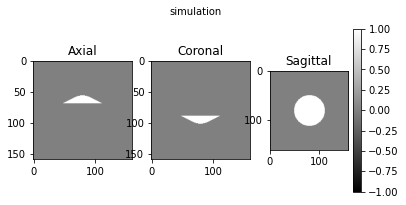

In [133]:
view_slices_3d(data_circle_, slice_nbr=68, vmin=-1, vmax=1, title='simulation')

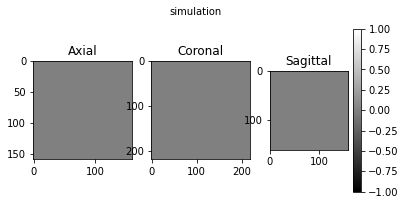

In [67]:
view_slices_3d(data, slice_nbr=10, vmin=-1, vmax=1,title='simulation')


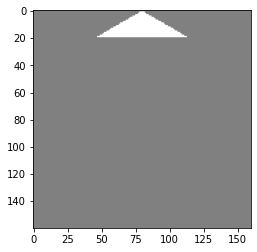

In [102]:
plt.imshow(data_circle_[:, :, 80], vmin=-1, vmax=1, cmap='gray')

In [95]:
    import nibabel as nib
    nft_img = nib.Nifti1Image(data_circle_, np.eye(4))
    nib.save(nft_img, 'img.nii.gz')

    img = nib.load('img.nii.gz')

    img_data = img.get_fdata()

    img_affine = img.affine

In [15]:
img_affine

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

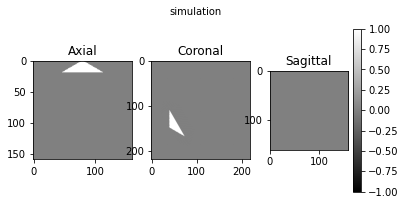

In [96]:
view_slices_3d(img_data, slice_nbr=80, vmin=-1, vmax=1,title='simulation')


In [1]:
import numpy as np

np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

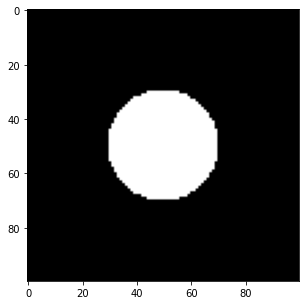

In [1]:
import numpy as np
from numpy import pi, sin, cos
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5, 5))

dimensionality = 100
R = 20.5
z = np.linspace(0, 15, 2)
theta = np.linspace(0, 2*pi, 200)
r = np.linspace(0, R, 2)
origin = [50, 50]

intensity = .8

image2d = np.zeros((dimensionality, dimensionality))

for theta_ in theta:
  index_x = round(R*sin(theta_)) + origin[0]
  index_y = round(R*cos(theta_)) + origin[1]

  image2d[min(index_x, 50): max(index_x, 50), min(50, index_y): max(50, index_y)] = intensity

#thetaval_index = np.where(theta >= pi)

#image2d[:, thetaval_index] = 0
#plt.subplot(131)
plt.imshow(image2d, cmap='gray')


In [ ]:
np.take(image2d, 50, 1)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [ ]:
image2d[1, 4]

3.0